In [17]:
import numpy as np
import pickle
import matplotlib.pyplot as plt



# analyze individual runs

In [5]:

run_iter = 2

bos_no_stop = pickle.load(open("saved_results/bos_mnist_no_stop_" + str(run_iter) + ".p", "rb"))
bos_with_stop = pickle.load(open("saved_results/bos_mnist_with_stop_" + str(run_iter) + ".p", "rb"))

epoch_values = bos_no_stop["all"]["epoch_values"]
conc_epoch_values = [e for epoch in epoch_values for e in epoch]
conc_epoch_values_cum = 1.0 - np.maximum.accumulate(conc_epoch_values)
print(len(conc_epoch_values_cum))

epoch_values = bos_with_stop["all"]["epoch_values"]
conc_epoch_values = [e for epoch in epoch_values for e in epoch]
conc_epoch_values_cum_bos = 1.0 - np.maximum.accumulate(conc_epoch_values)
print(len(conc_epoch_values_cum_bos))


2650
2822


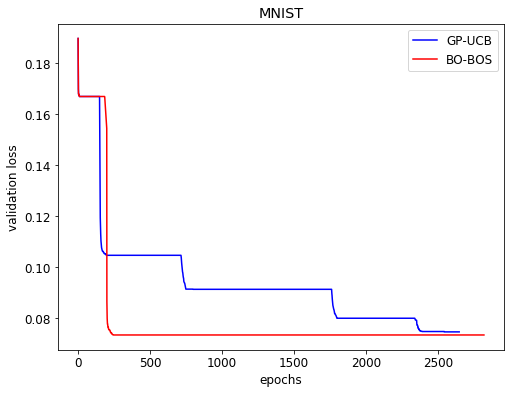

In [6]:

plt.rc('font', family='sans-serif', size=12)
plt.figure(figsize=(8, 6))
plt.plot(conc_epoch_values_cum, color='b')
plt.plot(conc_epoch_values_cum_bos, color='r')
plt.title("MNIST")
plt.xlabel("epochs")
plt.ylabel("validation loss")
plt.legend(("GP-UCB", "BO-BOS"))
axes = plt.gca()
# axes.set_ylim([0.07, 0.1])
plt.show()



# analyze runs


<font size="4">Each log file (represented by "result" below) is a dictionary, with the following key elements: </font> <br> <br>
**results["all"]["epoch_values"]**: this is a list, whose length is equal to the total number of BO iterations; each element of the list is another list corresponding to a particular iteration, which contains the validation accuracy after each training epoch in this particular iteration. <br> <br>
**results["all"]["eval_times"]**: this item has exactly the same shape as "epoch values", with each element representing the time at which the corresponding epoch value is obtained. <br> <br>
**results["all"]["time_started"]**: the starting time of the script, which is to be subtracted from each element of the "eval_times" to calculate the run time of the script. <br> <br>
**results["all"]["params"]**: this is a list whose length is equal to the number of BO iterations; each element of the list represents the the value of the hyper-parameters evaluated in the corresponding BO iteration. <br> <br>


In [35]:

min_len = 1e4 # get the minimum length among all runs, for visualization

epoch_values_no_stop = []
epoch_values_with_stop = []
for run_iter in np.arange(1, 11):
    # load runs without BOS
    bos_no_stop = pickle.load(open("saved_results/bos_mnist_no_stop_" + str(run_iter) + ".p", "rb"))
    epoch_values = bos_no_stop["all"]["epoch_values"]
    conc_epoch_values = [e for epoch in epoch_values for e in epoch]
    conc_epoch_values_cum = 1.0 - np.maximum.accumulate(conc_epoch_values)

    if len(conc_epoch_values_cum) < min_len:
        min_len = len(conc_epoch_values_cum)
    epoch_values_no_stop.append(conc_epoch_values_cum)

    
    # load runs with BOS
    bos_with_stop = pickle.load(open("saved_results/bos_mnist_with_stop_" + str(run_iter) + ".p", "rb"))
    epoch_values = bos_with_stop["all"]["epoch_values"]
    conc_epoch_values = [e for epoch in epoch_values for e in epoch]
    conc_epoch_values_cum_bos = 1.0 - np.maximum.accumulate(conc_epoch_values)
    
    if len(conc_epoch_values_cum_bos) < min_len:
        min_len = len(conc_epoch_values_cum_bos)
    epoch_values_with_stop.append(conc_epoch_values_cum_bos)
    


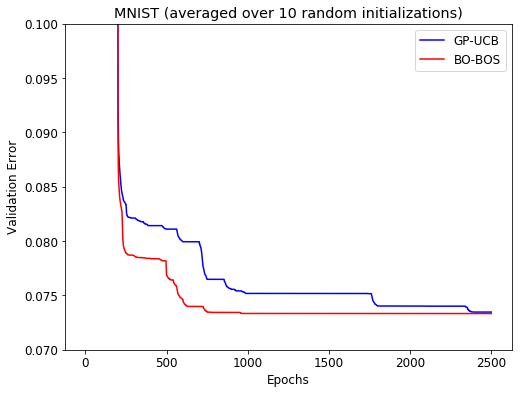

In [39]:

epochs_no_stop_trunc = np.array([epochs[:min_len] for epochs in epoch_values_no_stop])
epochs_no_stop_trunc_mean = np.mean(epochs_no_stop_trunc, axis=0)

epochs_with_stop_trunc = np.array([epochs[:min_len] for epochs in epoch_values_with_stop])
epochs_with_stop_trunc_mean = np.mean(epochs_with_stop_trunc, axis=0)

plt.rc('font', family='sans-serif', size=12)
plt.figure(figsize=(8, 6))
plt.plot(epochs_no_stop_trunc_mean, color='b')
plt.plot(epochs_with_stop_trunc_mean, color='r')
plt.title("MNIST (averaged over 10 random initializations)")
plt.xlabel("Epochs")
plt.ylabel("Validation Error")

axes = plt.gca()
# axes.set_xlim([1, 30])
axes.set_ylim([0.07, 0.10])

plt.legend(("GP-UCB", "BO-BOS"))
plt.show()


